In [2]:
import cv2
import glob
import os
import random
import pandas as pd
from shutil import copy
from shutil import copytree, rmtree
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,Adadelta,SGD
from tensorflow.keras.backend import mean
from tensorflow.keras.losses import mse
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from tensorflow.keras.applications.inception_v3 import preprocess_input, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV

### We want to extract every different dish we have in our subfolders

In [3]:
path = "../input/images/"

In [4]:
folders=glob.glob(f'{path}*')

In [5]:
def take_dish_name(path):
    dishes=glob.glob(f'{path}*')
    names=[]
    for dish in dishes:
        names.append(dish.replace(r'../input/images/',''))
    return names

In [6]:
names=take_dish_name(path)

In [7]:
names[0]

'lobster_roll_sandwich'

In [44]:
names[0:5]

['lobster_roll_sandwich', 'beet_salad', 'red_velvet_cake', 'falafel', 'paella']

### Displaying photos to check them

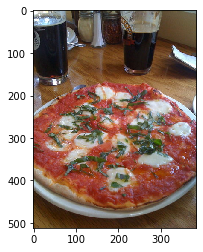

In [8]:
img = Image.open("../input/images/pizza/2965.jpg")
plt.imshow(np.array(img))

### We have a meta folder where train and test.txt files are stored, purposing train and test image sampling
#### We will use this as ImageDataGenerator works with folders' path

In [9]:
!head ../input/meta/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [56]:
def pictures_to_dir(source,dest,names,txt):
    if os.path.exists(dest):
        rmtree(dest) 
    else:
        os.makedirs(dest)
    lines=[]
    with open(txt,'r') as f:
        for line in f.readlines():
            line=line.strip()
            line=line.split('/')
            line=line[1]+'.jpg'
            lines.append(line)

    for name in names:
        dishes = [
            *glob.glob(f"{source}{name}/*.jpg"),
            *glob.glob(f"{source}{name}/*.JPG")
        ]

        print("Creating train data folder with new classes")
        if not os.path.exists(os.path.join(dest,name)):
            os.makedirs(os.path.join(dest,name))
        for dish in dishes:
            if dish.split('/')[3]==name and dish.split('/')[4] in lines:
                print("Copying ",dish, "into", dest)
                copy(dish, os.path.join(dest,name,dish.split('/')[4]))
        
    print('Done!')


In [57]:
pictures_to_dir(source="../input/images/",dest="../output/images/train_part",names=names[0:5],txt='../input/meta/meta/train.txt')

Creating train data folder with new classes
Copying  ../input/images/lobster_roll_sandwich/2019505.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/708911.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/784321.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1626426.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/608999.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2724313.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/836473.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2183273.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/524159.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/743952.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sand

Copying  ../input/images/lobster_roll_sandwich/1054335.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/727609.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/655763.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1540477.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/580110.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1891534.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/616850.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/584980.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/740329.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/772558.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/311541.jpg into ../output/images/train_p

Copying  ../input/images/lobster_roll_sandwich/2835515.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/643049.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/713323.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/3745552.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/3533882.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/87470.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2291378.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/90203.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2044607.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/719029.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1864047.jpg into ../output/images/train_

Copying  ../input/images/lobster_roll_sandwich/3655527.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/594956.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/615946.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1421995.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2470622.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/369116.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/630005.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/96654.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2293264.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/889794.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1363443.jpg into ../output/images/train_

Copying  ../input/images/lobster_roll_sandwich/184698.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1390627.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/626803.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2551566.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/63532.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1625497.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1211103.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1404432.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/147165.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/772140.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/884466.jpg into ../output/images/train_

Copying  ../input/images/lobster_roll_sandwich/673660.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/3654596.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2184561.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/1051669.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/812826.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/3452264.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/375566.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2553309.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/274853.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/229841.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2204658.jpg into ../output/images/trai

Copying  ../input/images/lobster_roll_sandwich/728789.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/71248.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/3326323.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/424788.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2398676.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/937025.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2818835.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/839549.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2861749.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2713406.jpg into ../output/images/train_part
Copying  ../input/images/lobster_roll_sandwich/2674002.jpg into ../output/images/train

Copying  ../input/images/beet_salad/2191461.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/239826.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1634598.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2304723.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/170015.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3923546.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2696436.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1945506.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3738880.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3583683.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3348338.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/651251.jpg into ../output/images/train_part
Copying  ../input/images/beet_s

Copying  ../input/images/beet_salad/180899.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3794286.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1324204.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2098163.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3125655.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3574829.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2680361.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/190261.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3144497.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/761999.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/792717.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1643533.jpg into ../output/images/train_part
Copying  ../input/images/beet_sa

Copying  ../input/images/beet_salad/1656290.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2971865.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2012446.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2178720.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1929694.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3251026.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/206201.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2885055.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1173705.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3398820.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/388906.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3238028.jpg into ../output/images/train_part
Copying  ../input/images/beet_

Copying  ../input/images/beet_salad/1123489.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/273691.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1907971.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1094628.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3392364.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2808614.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3694889.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3775489.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1855818.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/3014700.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/2583587.jpg into ../output/images/train_part
Copying  ../input/images/beet_salad/1437459.jpg into ../output/images/train_part
Copying  ../input/images/beet

Copying  ../input/images/red_velvet_cake/2104283.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3375774.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3321370.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1327157.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3426266.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/364691.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1739905.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2230972.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2143239.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2829028.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1313315.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1195547.jpg in

Copying  ../input/images/red_velvet_cake/237364.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1071251.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2999709.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2083124.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/442313.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/798716.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/317534.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3387239.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/588552.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/77292.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1903340.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1412151.jpg into ../

Copying  ../input/images/red_velvet_cake/2071055.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1299118.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2491362.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3119460.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2411016.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/701569.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/275122.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1089222.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2922858.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2038167.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3817717.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2933570.jpg int

Copying  ../input/images/red_velvet_cake/3650093.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/909143.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2014741.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1742241.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/104733.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/310047.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2217206.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1191329.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/190330.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3493971.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3641990.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1972764.jpg into 

Copying  ../input/images/red_velvet_cake/2980250.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2371709.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1742894.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2894233.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3810798.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/7330.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/684568.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1636426.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1233845.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2158927.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/765959.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1126653.jpg into .

Copying  ../input/images/red_velvet_cake/356297.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2317258.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/645756.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3286168.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/452982.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2337451.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3290337.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/2695090.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3413936.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3814967.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/3026588.jpg into ../output/images/train_part
Copying  ../input/images/red_velvet_cake/1168142.jpg into

Copying  ../input/images/falafel/2260967.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1003181.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2161539.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1920150.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2771341.jpg into ../output/images/train_part
Copying  ../input/images/falafel/561445.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2790719.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3749022.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1885462.jpg into ../output/images/train_part
Copying  ../input/images/falafel/442025.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2628288.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2324375.jpg into ../output/images/train_part
Copying  ../input/images/falafel/680602.jpg into ../output/images/

Copying  ../input/images/falafel/326746.jpg into ../output/images/train_part
Copying  ../input/images/falafel/737403.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1245907.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1764244.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3853832.jpg into ../output/images/train_part
Copying  ../input/images/falafel/119752.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1986942.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1913596.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1565700.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3788032.jpg into ../output/images/train_part
Copying  ../input/images/falafel/7396.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3554995.jpg into ../output/images/train_part
Copying  ../input/images/falafel/983810.jpg into ../output/images/trai

Copying  ../input/images/falafel/2595058.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2062750.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3082864.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1247066.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3766050.jpg into ../output/images/train_part
Copying  ../input/images/falafel/654741.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1046916.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2977898.jpg into ../output/images/train_part
Copying  ../input/images/falafel/235831.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1611924.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3182458.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1687117.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1203121.jpg into ../output/images

Copying  ../input/images/falafel/3533366.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3528321.jpg into ../output/images/train_part
Copying  ../input/images/falafel/689321.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2329112.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2765773.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3086998.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2585154.jpg into ../output/images/train_part
Copying  ../input/images/falafel/237671.jpg into ../output/images/train_part
Copying  ../input/images/falafel/37202.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2765967.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1907718.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2930114.jpg into ../output/images/train_part
Copying  ../input/images/falafel/889967.jpg into ../output/images/tr

Copying  ../input/images/falafel/1114177.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2437229.jpg into ../output/images/train_part
Copying  ../input/images/falafel/194756.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3655456.jpg into ../output/images/train_part
Copying  ../input/images/falafel/34649.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2280700.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3582607.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1290690.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3197087.jpg into ../output/images/train_part
Copying  ../input/images/falafel/337870.jpg into ../output/images/train_part
Copying  ../input/images/falafel/860316.jpg into ../output/images/train_part
Copying  ../input/images/falafel/129948.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2611080.jpg into ../output/images/tra

Copying  ../input/images/falafel/3570465.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3122252.jpg into ../output/images/train_part
Copying  ../input/images/falafel/2655828.jpg into ../output/images/train_part
Copying  ../input/images/falafel/906230.jpg into ../output/images/train_part
Copying  ../input/images/falafel/3112064.jpg into ../output/images/train_part
Copying  ../input/images/falafel/32746.jpg into ../output/images/train_part
Copying  ../input/images/falafel/799422.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1120179.jpg into ../output/images/train_part
Copying  ../input/images/falafel/1635436.jpg into ../output/images/train_part
Copying  ../input/images/falafel/478888.jpg into ../output/images/train_part
Creating train data folder with new classes
Copying  ../input/images/paella/2624031.jpg into ../output/images/train_part
Copying  ../input/images/paella/1100859.jpg into ../output/images/train_part
Copying  ../input/images/pa

Copying  ../input/images/paella/2880587.jpg into ../output/images/train_part
Copying  ../input/images/paella/73919.jpg into ../output/images/train_part
Copying  ../input/images/paella/1888513.jpg into ../output/images/train_part
Copying  ../input/images/paella/1111733.jpg into ../output/images/train_part
Copying  ../input/images/paella/840104.jpg into ../output/images/train_part
Copying  ../input/images/paella/3761623.jpg into ../output/images/train_part
Copying  ../input/images/paella/272052.jpg into ../output/images/train_part
Copying  ../input/images/paella/2140476.jpg into ../output/images/train_part
Copying  ../input/images/paella/175903.jpg into ../output/images/train_part
Copying  ../input/images/paella/3059810.jpg into ../output/images/train_part
Copying  ../input/images/paella/884775.jpg into ../output/images/train_part
Copying  ../input/images/paella/3186135.jpg into ../output/images/train_part
Copying  ../input/images/paella/769402.jpg into ../output/images/train_part
Copyin

Copying  ../input/images/paella/3605239.jpg into ../output/images/train_part
Copying  ../input/images/paella/892121.jpg into ../output/images/train_part
Copying  ../input/images/paella/345283.jpg into ../output/images/train_part
Copying  ../input/images/paella/2473756.jpg into ../output/images/train_part
Copying  ../input/images/paella/3641348.jpg into ../output/images/train_part
Copying  ../input/images/paella/2940049.jpg into ../output/images/train_part
Copying  ../input/images/paella/3310882.jpg into ../output/images/train_part
Copying  ../input/images/paella/1679354.jpg into ../output/images/train_part
Copying  ../input/images/paella/797289.jpg into ../output/images/train_part
Copying  ../input/images/paella/390839.jpg into ../output/images/train_part
Copying  ../input/images/paella/692573.jpg into ../output/images/train_part
Copying  ../input/images/paella/1690697.jpg into ../output/images/train_part
Copying  ../input/images/paella/955047.jpg into ../output/images/train_part
Copyi

Copying  ../input/images/paella/744167.jpg into ../output/images/train_part
Copying  ../input/images/paella/575389.jpg into ../output/images/train_part
Copying  ../input/images/paella/2003508.jpg into ../output/images/train_part
Copying  ../input/images/paella/2552474.jpg into ../output/images/train_part
Copying  ../input/images/paella/3518263.jpg into ../output/images/train_part
Copying  ../input/images/paella/1318738.jpg into ../output/images/train_part
Copying  ../input/images/paella/3338094.jpg into ../output/images/train_part
Copying  ../input/images/paella/3177465.jpg into ../output/images/train_part
Copying  ../input/images/paella/3853268.jpg into ../output/images/train_part
Copying  ../input/images/paella/761749.jpg into ../output/images/train_part
Copying  ../input/images/paella/2441453.jpg into ../output/images/train_part
Copying  ../input/images/paella/3777118.jpg into ../output/images/train_part
Copying  ../input/images/paella/3459061.jpg into ../output/images/train_part
Co

Copying  ../input/images/paella/1689036.jpg into ../output/images/train_part
Copying  ../input/images/paella/3212790.jpg into ../output/images/train_part
Copying  ../input/images/paella/3523803.jpg into ../output/images/train_part
Copying  ../input/images/paella/1523249.jpg into ../output/images/train_part
Copying  ../input/images/paella/2837641.jpg into ../output/images/train_part
Copying  ../input/images/paella/3216085.jpg into ../output/images/train_part
Copying  ../input/images/paella/647480.jpg into ../output/images/train_part
Copying  ../input/images/paella/352818.jpg into ../output/images/train_part
Copying  ../input/images/paella/1806502.jpg into ../output/images/train_part
Copying  ../input/images/paella/2901232.jpg into ../output/images/train_part
Copying  ../input/images/paella/1662668.jpg into ../output/images/train_part
Copying  ../input/images/paella/281620.jpg into ../output/images/train_part
Copying  ../input/images/paella/265807.jpg into ../output/images/train_part
Cop

Copying  ../input/images/paella/315607.jpg into ../output/images/train_part
Copying  ../input/images/paella/381148.jpg into ../output/images/train_part
Copying  ../input/images/paella/279485.jpg into ../output/images/train_part
Copying  ../input/images/paella/1446096.jpg into ../output/images/train_part
Copying  ../input/images/paella/117820.jpg into ../output/images/train_part
Copying  ../input/images/paella/2009100.jpg into ../output/images/train_part
Copying  ../input/images/paella/2376351.jpg into ../output/images/train_part
Copying  ../input/images/paella/2659883.jpg into ../output/images/train_part
Copying  ../input/images/paella/2104336.jpg into ../output/images/train_part
Copying  ../input/images/paella/1955779.jpg into ../output/images/train_part
Copying  ../input/images/paella/3297897.jpg into ../output/images/train_part
Copying  ../input/images/paella/842073.jpg into ../output/images/train_part
Copying  ../input/images/paella/1867405.jpg into ../output/images/train_part
Copy

In [58]:
pictures_to_dir(source="../input/images/",dest="../output/images/test_part",names=names[0:5],txt='../input/meta/meta/test.txt')

Creating train data folder with new classes
Copying  ../input/images/lobster_roll_sandwich/849365.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/1145571.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/194722.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/392766.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/1821009.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/129771.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/146503.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/2315158.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/690313.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/1248367.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/39211

Copying  ../input/images/lobster_roll_sandwich/910048.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/2074737.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/2140373.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/1029665.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/104300.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/163487.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/1799839.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/2827793.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/148607.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/368538.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/2502716.jpg into ../output/images/test_part
Copy

Copying  ../input/images/lobster_roll_sandwich/3390747.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/3815387.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/3480703.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/1309325.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/689652.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/505038.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/2201981.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/1939748.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/998319.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/474538.jpg into ../output/images/test_part
Copying  ../input/images/lobster_roll_sandwich/464564.jpg into ../output/images/test_part
Copy

Copying  ../input/images/beet_salad/3379002.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1912120.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1372465.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/3333485.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1226692.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/3840128.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/3704723.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1288727.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1263247.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/3401830.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/229832.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/2705890.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/11009

Copying  ../input/images/beet_salad/2502991.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1536883.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/2468215.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/2155565.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/2940332.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1485590.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1291153.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/2008718.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1284036.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/1030522.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/2812281.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/2768246.jpg into ../output/images/test_part
Copying  ../input/images/beet_salad/5083

Copying  ../input/images/red_velvet_cake/524755.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/94192.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/272773.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/513410.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2580805.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/628076.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2634031.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/851600.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/3063395.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2427544.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2436212.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2289408.jpg into ../output/imag

Copying  ../input/images/red_velvet_cake/2937913.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2000127.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/195989.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/97406.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/1297812.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/27282.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2629187.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/891048.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2653679.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/344691.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/2973527.jpg into ../output/images/test_part
Copying  ../input/images/red_velvet_cake/1598868.jpg into ../output/imag

Copying  ../input/images/falafel/1914755.jpg into ../output/images/test_part
Copying  ../input/images/falafel/3089742.jpg into ../output/images/test_part
Copying  ../input/images/falafel/190810.jpg into ../output/images/test_part
Copying  ../input/images/falafel/2403497.jpg into ../output/images/test_part
Copying  ../input/images/falafel/1051179.jpg into ../output/images/test_part
Copying  ../input/images/falafel/585805.jpg into ../output/images/test_part
Copying  ../input/images/falafel/3816353.jpg into ../output/images/test_part
Copying  ../input/images/falafel/3201313.jpg into ../output/images/test_part
Copying  ../input/images/falafel/1399149.jpg into ../output/images/test_part
Copying  ../input/images/falafel/2150311.jpg into ../output/images/test_part
Copying  ../input/images/falafel/3145827.jpg into ../output/images/test_part
Copying  ../input/images/falafel/1837786.jpg into ../output/images/test_part
Copying  ../input/images/falafel/1588921.jpg into ../output/images/test_part
C

Copying  ../input/images/paella/227952.jpg into ../output/images/test_part
Copying  ../input/images/paella/860907.jpg into ../output/images/test_part
Copying  ../input/images/paella/1465685.jpg into ../output/images/test_part
Copying  ../input/images/paella/1481053.jpg into ../output/images/test_part
Copying  ../input/images/paella/2811643.jpg into ../output/images/test_part
Copying  ../input/images/paella/2371918.jpg into ../output/images/test_part
Copying  ../input/images/paella/1850214.jpg into ../output/images/test_part
Copying  ../input/images/paella/3093412.jpg into ../output/images/test_part
Copying  ../input/images/paella/2675666.jpg into ../output/images/test_part
Copying  ../input/images/paella/145471.jpg into ../output/images/test_part
Copying  ../input/images/paella/3915105.jpg into ../output/images/test_part
Copying  ../input/images/paella/1801285.jpg into ../output/images/test_part
Copying  ../input/images/paella/2906006.jpg into ../output/images/test_part
Copying  ../inp

Copying  ../input/images/paella/2553555.jpg into ../output/images/test_part
Copying  ../input/images/paella/2541809.jpg into ../output/images/test_part
Copying  ../input/images/paella/3040077.jpg into ../output/images/test_part
Copying  ../input/images/paella/2357271.jpg into ../output/images/test_part
Copying  ../input/images/paella/2473148.jpg into ../output/images/test_part
Copying  ../input/images/paella/3385497.jpg into ../output/images/test_part
Copying  ../input/images/paella/3367039.jpg into ../output/images/test_part
Done!


In [59]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        horizontal_flip=True)

In [60]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [76]:
train_generator = train_datagen.flow_from_directory(
    '../output/images/train_part',
    target_size=(75,75),
    batch_size=80,
    class_mode='categorical',
    color_mode='rgb')

Found 3750 images belonging to 5 classes.


In [77]:
test_generator = test_datagen.flow_from_directory(
    '../output/images/test_part',
    target_size=(75,75),
    batch_size=80,
    class_mode='categorical',
    color_mode='rgb')

Found 1250 images belonging to 5 classes.


In [68]:
test_generator.class_indices

{'beet_salad': 0,
 'falafel': 1,
 'lobster_roll_sandwich': 2,
 'paella': 3,
 'red_velvet_cake': 4}

In [69]:
train_generator.class_indices

{'beet_salad': 0,
 'falafel': 1,
 'lobster_roll_sandwich': 2,
 'paella': 3,
 'red_velvet_cake': 4}

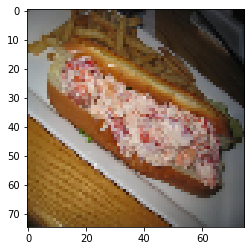

In [70]:
plt.imshow(train_generator[0][0][0])

### We define out net topology

### Model 2

In [71]:
#batch_size=80
epocas=50
n_classes=len(train_generator.class_indices)
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#optimizer = tf.train.AdamOptimizer(0.001)
opt = SGD(lr=1e-2, momentum=0.9, decay=1e-2 / epocas)
loss="categorical_crossentropy"
optimizers=[Adam(),Adadelta(),SGD(learning_rate=1)]

In [78]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                  #kernel_initializer='he_normal', 
                 input_shape=(75,75,3)))

model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

### We define earlyStopping, so that fitting stops if loss is not decreasing

In [73]:
earlystopping = EarlyStopping(
    monitor = 'loss', 
    verbose = 1, 
    patience = 20
)

In [80]:
history = model.fit(train_generator,
                    steps_per_epoch = (750*n_classes)// batch_size,
                    validation_data=test_generator,
                    validation_steps=(250*n_classes) // batch_size,
                    batch_size=1,
                    epochs=epocas,
                    verbose=1,
                    callbacks=[earlystopping])

Epoch 1/50
46/46 [==============================] - 22s 471ms/step - loss: 1.2840 - accuracy: 0.4613 - val_loss: 1.2725 - val_accuracy: 0.4952
Epoch 2/50
46/46 [==============================] - 18s 396ms/step - loss: 1.2389 - accuracy: 0.4869 - val_loss: 1.1975 - val_accuracy: 0.5176
Epoch 3/50
46/46 [==============================] - 18s 388ms/step - loss: 1.2009 - accuracy: 0.5166 - val_loss: 1.2172 - val_accuracy: 0.4976
Epoch 4/50
46/46 [==============================] - 18s 388ms/step - loss: 1.1591 - accuracy: 0.5387 - val_loss: 1.0985 - val_accuracy: 0.5688
Epoch 5/50
46/46 [==============================] - 18s 390ms/step - loss: 1.1130 - accuracy: 0.5499 - val_loss: 1.0557 - val_accuracy: 0.5808
Epoch 6/50
46/46 [==============================] - 18s 394ms/step - loss: 1.0784 - accuracy: 0.5597 - val_loss: 1.0767 - val_accuracy: 0.5552
Epoch 7/50
46/46 [==============================] - 18s 399ms/step - loss: 1.0816 - accuracy: 0.5684 - val_loss: 1.0795 - val_accuracy: 0.5536